# Исследование магазина комьютерных игр

### Описание проекта

#### Краткое описание

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.


В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

***Цель проекта:*** Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


#### Описание данных

* `Name` — название игры

* `Platform` — платформа

* `Year_of_Release` — год выпуска

* `Genre` — жанр игры

* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)

* `EU_sales` — продажи в Европе (миллионы проданных копий)

* `JP_sales` — продажи в Японии (миллионы проданных копий)

* `Other_sales` — продажи в других странах (миллионы проданных копий)

* `Critic_Score` — оценка критиков (максимум 100)

* `User_Score` — оценка пользователей (максимум 10)

* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


Данные за 2016 год могут быть неполными.

#### План работы

1. Открываем датасет, изучаем общую информацию. Ищем проблемные места.

2. Предобработка данных. Убираем пропуски, дубликаты, аномалии где это возможно, меняем тип данных и добавляем новые столбцы где необходимо.

3. Исследовательский анализ. Описываем и визуализируем информацию о продажах по платформам, регионам, жанрам. Составим портрет пользователя каждого региона. 

4. Проверка гипотез.

5. Общий вывод.

### Проект

#### Шаг 1. Загрузка данных

In [1]:
# Импортируем необходимые для работы библиотеки.

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
from math import isnan
import os

In [2]:
# Сохраняем исходный датафрейм в переменной games.

pth1 = 'C:\\Users\\mpeat\\Desktop\\Practicum_Data_Science\\compilation_project\\games.csv'
pth2 = 'https://code.s3.yandex.net/datasets/games.csv'
    
if os.path.exists(pth1):
    games = pd.read_csv(pth1)
else:
    games = pd.read_csv(pth2)

Выведем датафрейм и общую информацию.

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** Предварительно изучив датафрейм обнаружены следующие проблемы:
* название колонок имеет неудобный формат, лучше привести к "змеиному" регистру для удобства работы;
* много пропусков в столбцах с оценками и возрастным рейтингом;
* есть небольшое количество пропусков в столбцах с названием игры, жанром;
* формат данных в колонке с годом релиза имеет вид `float`, лучше поменять на `int`;
* формат данных с столбце `User_Score` имеет строковый вид.

#### Шаг 2. Предобработка данных

In [5]:
games.sample(3)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
13548,Shaun the Sheep,DS,2008.0,Adventure,0.04,0.00,0.0,0.00,58.0,tbd,E
14931,The King of Fighters: Maximum Impact - Maniax,XB,NaN,Fighting,0.02,0.01,0.0,0.00,NaN,NaN,NaN
5782,Jonah Lomu Rugby Challenge,X360,2011.0,Sports,0.09,0.19,0.0,0.03,73.0,6,E


In [6]:
games.columns = games.columns.str.lower() # приведем названия колонок к нижнему регистру

In [7]:
games[games['year_of_release'].isna()] # смотрим пропуски в столбцах с годом релиза

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Имеем **269** пропусков. Довольно часто одна и та же игра может выходить на разных платформах. Посмотрим, есть ли такие случаи.

In [8]:
games.query(f'name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Вбив в запрос первую же игру, видим что *Madden NFL 2004* выходила на 4 платформах. И на всех указан 2003 год, кроме платформы PS2.

Попробуем заполнить пустые значения, взяв значения года выпуска из других платформ.

In [9]:
# функция заполнения пропусков года релиза

games['year_of_release'] = (games[['name', 'year_of_release']]
                            .apply(lambda x: x['year_of_release'] if not isnan(x['year_of_release'])
                                          else games.query(f'name == "{x["name"]}"')['year_of_release'].min(), axis=1))


In [10]:
games['year_of_release'].isna().sum() # смотрим количество пропусков

146

Количество пустых строк с годом релиза снизилось с **269** до **146**. Удалось заполнить **123** строки. 

In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16569 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Оставшиеся 146 строк с пропусками года релиза можно удалить. Это менее 1% данных. Также удалим по 2 строки с пропусками в названии игры и ее жанре.

In [12]:
games = games.dropna(subset=['year_of_release', 'name', 'genre']) # удаляем строки с пропусками

In [13]:
games = games.reset_index(drop=True) # сбрасываем индексы

In [14]:
games['year_of_release'] = games['year_of_release'].astype('int') # преобразуем год выпуска в целочисленный тип

Столбец `user_score` имеет формат данных **`object`**. Посмотрим на этот столбец поподробнее.

In [15]:
games['user_score'].value_counts()

tbd    2394
7.8     324
8       288
8.2     279
8.3     253
       ... 
0.2       2
0.5       2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Самое распространенное значение *tbd* (от англ. "to be determined" - будет определено). Будет определено, значит не определено, что равносильно NaN.

In [16]:
games['user_score'] = games['user_score'].replace('tbd', float('nan')) # меняем tbd на NaN

In [17]:
games['user_score'] = games['user_score'].astype('float') # выставляем формат float в оценках пользователей

По аналогии с годом релиза, пропуски с колонках с возрастным рейтингом можно заполнить значениями этих же игр из других платформ.

In [18]:
games['rating'].isna().sum() # пропусков до заполнения

6699

In [19]:
# функция заполнения пропусков возрастного рейтинга 'rating'

games['rating'] = (games[['name', 'rating']]
                            .apply(lambda x: x['rating'] if type(x['rating']) == str
                                          else games.query(f'name == "{x["name"]}"')['rating'].asof(games['rating'].index[-1]), axis=1))
games['rating'].isna().sum()

6262

Еще **437** пропусков заполнили.

Оставшиеся пропуски никак заполнить не получится, поэтому оставим их как есть.

In [20]:
games.duplicated().sum() # смотрим количество дубликатов

0

In [21]:
# Добавим суммарные продажи total_sales

games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [22]:
# Смотрим итоговый результат

games.info()
games.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           10305 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5032,Super Dragon Ball Z,PS2,2006,Fighting,0.09,0.07,0.19,0.02,72.0,5.8,T,0.37
3130,Rayman 2: The Great Escape,N64,1999,Platform,0.40,0.22,0.00,0.02,NaN,NaN,NaN,0.64
12456,Olympic Hockey 98,N64,1998,Sports,0.05,0.01,0.00,0.00,NaN,NaN,NaN,0.06
4793,The Urbz: Sims in the City,GC,2004,Simulation,0.24,0.14,0.00,0.02,73.0,8.4,T,0.40
13473,B's-LOG Party♪,PSP,2010,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN,0.04


**Вывод:** В ходе предобработки данных были проведены следующие мероприятия:
* названия столбцов приведены к "змеиному_регистру";
* столбец `year_of_release` привели в целочисленный тип **`int`**, заполнили примерно половину пропусков, оставшиеся 146 пустых строк удалили;
* было удалено еще 2 строки с попусками в столбцах `name` и `genre`;
* избавились от аббревиатуры *tbd*("будет определено") в столбце `user_score`, заменив на NaN, привели столбец к числовому формату **`float`**;
* заполнили примерно 400 пропусков в столбце `rating` аналогичным образом, как в столбце `year_of_release`;
* добавили столбец с суммарными продажами `total_sales`, сложив все столбцы `*_sales`.

В конечном результате из **16715** строк осталось **16567** что составляет **99.1%** от общего числа. Также осталось очень много пропусков(порядка половины) в столбцах с оценками, и возрастным рейтингом. Их оставили как есть.

#### Шаг 3. Исследовательский анализ данных

##### Количество игр по годам

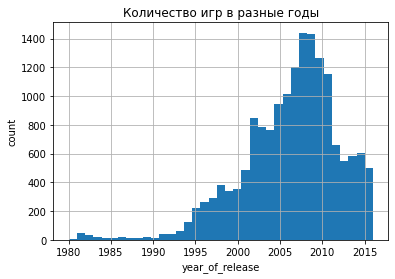

In [23]:
# Посмотрим сколько игр выпускалось в разные годы

games['year_of_release'].hist(bins=37)
plt.title('Количество игр в разные годы')
plt.xlabel('year_of_release')
plt.ylabel('count')
None

До 1990 года выпускалось мало игр, далее видим рост индустрии.

##### Продажи по платформам

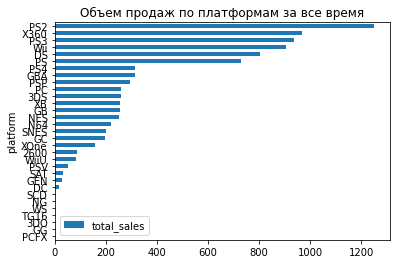

In [24]:
# Объем продаж по платформам за все время

total_sales_platform = (
    games
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales')
)

total_sales_platform.plot.barh(title = 'Объем продаж по платформам за все время')
None

PS2 самая популярная платформа с большим отрывом.

Посмотрим объем продаж за каждый год в первом десятке.

In [25]:
total_sales_platform.tail(10).index # первая десятка

Index(['PC', 'PSP', 'GBA', 'PS4', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'], dtype='object', name='platform')

время жизни каждой платформы [3, 7, 9, 10, 11, 11, 14, 25, 28, 31]


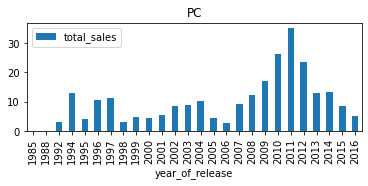

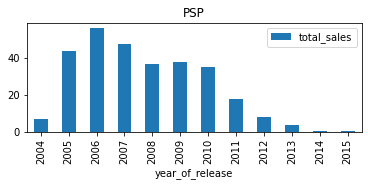

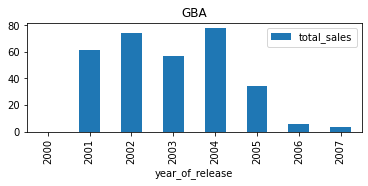

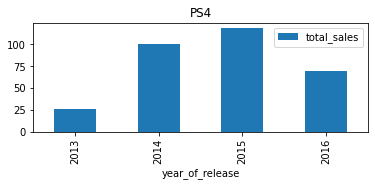

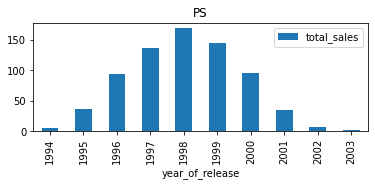

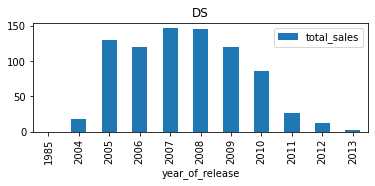

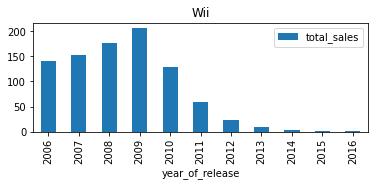

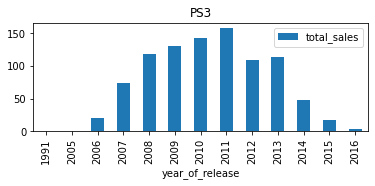

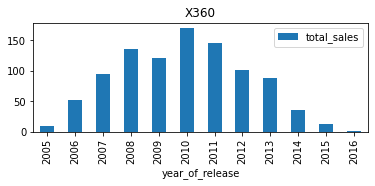

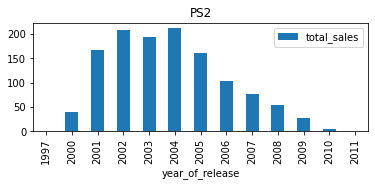

In [26]:
# Строим распределение продаж

lifetime=[]
for p in total_sales_platform.tail(10).index:
    platform = (
        games
        .query(f'platform == "{p}"')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    )
    lifetime.append(platform.index.max() - platform.index.min())
    platform.plot.bar(figsize=(6, 2), title=p)
    None
print('время жизни каждой платформы', sorted(lifetime))

Можем сделать вывод, что в среднем игры на платформу выходят примерно 10 лет. Сначала идет рост продаж, через 3-5 лет наступает пик продаж, далее спад. 

Исходя из вышесказанного, актуальный период составляет <span style="color:blue">3 года</span>, значит игры, которые вышли больше <span style="color:blue">3 лет</span> назад смотреть смысла нет, а следовательно далее будем смотреть период после <span style="color:blue">2013 года</span>.

In [57]:
games_actual = games.query('year_of_release > 2013') # срез игр в последние 3 года

##### Топ платформ

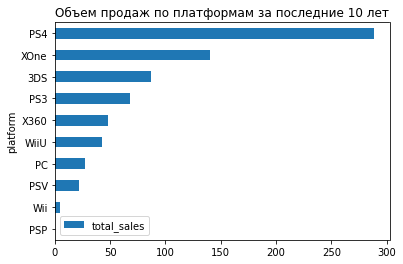

In [58]:
# Объем продаж по платформам за актуальный период

total_sales_platform = (games_actual
                        .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                        .sort_values(by='total_sales')
                       )

total_sales_platform.plot.barh(title = 'Объем продаж по платформам за последние 10 лет')
None

За последние 10 лет, в лидеры продаж вышли PS3 и X360, но это консоли предпоследнего поколения.

Для выбора самых перспективных платформ еще нужно посмотреть объем продаж за каждый год.

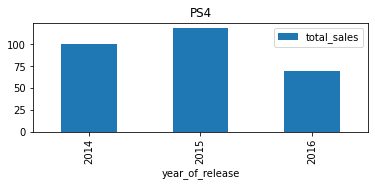

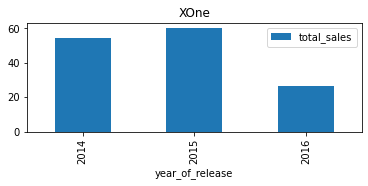

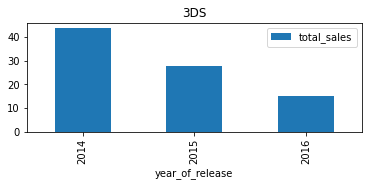

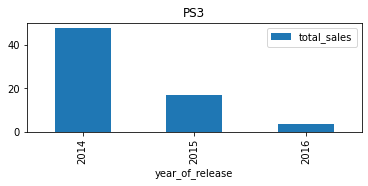

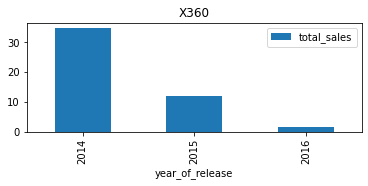

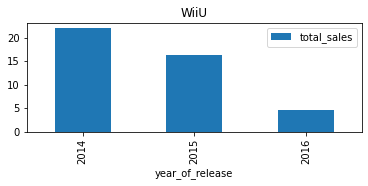

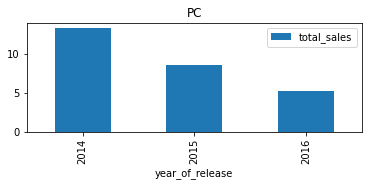

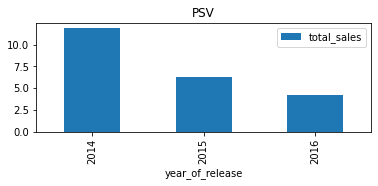

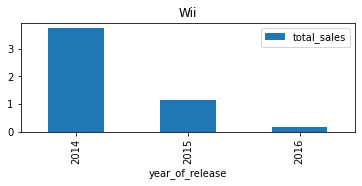

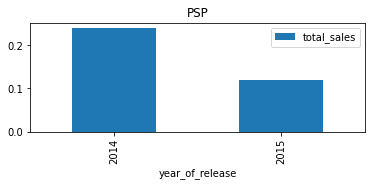

In [59]:
# Для каждой платформы построим распределение продаж по годам

for p in total_sales_platform.sort_values(by='total_sales', ascending=False).index:
    platform = (
        games_actual
        .query(f'platform == "{p}"')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    )
    platform.plot.bar(figsize=(6, 2), title=p)    
    None

Из самых перспективных платформ, можно выделить **PS4 и XOne** и **3DS**. С каждым годом они показывают рост продаж(в 2016 меньше, т.к. данные за 2016 неполные). Также не стоит сбрасывать со счетов **WiiU, PS3 и X360**. Несмотря на снижение продаж, к 2016 году данные платформы еще не потеряли актуальность и на них все еще выходит довольно много игр. Что касается PC то по моему мнению на компьютер игры будут выходить всегда, а значит его точно стоит рассмотреть как топ платформу.

Самые персперктивные платформы: **PS4, XOne, 3DS, PS3, X360, WiiU**

In [32]:
top_platformes=['PS4', 'XOne', '3DS', 'PC', 'WiiU', 'PSV'] # список самых перспективных платформ

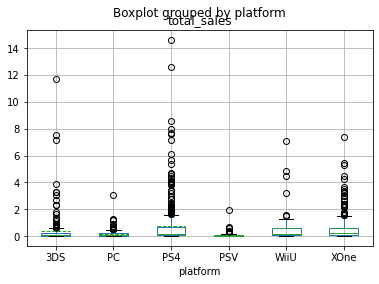

In [33]:
# Построим ящик с усами

(
    games_actual
    .query(f'platform in {top_platformes}')
    .boxplot(column='total_sales', by='platform', showmeans=True,
             meanline=True)
)
None

Из-за выбросов очень сложно интерпретировать рисунок. Уберем самые выбивающиеся значения.

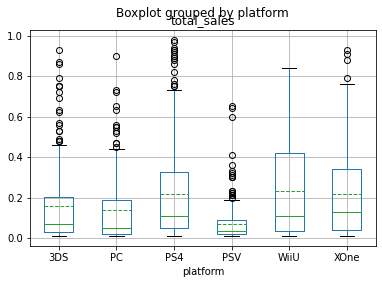

In [34]:
# Уберем все что больше 1

games_actual_not_outlier = (games_actual
                            .query(f'platform in {top_platformes} and total_sales < 1'))
                            
games_actual_not_outlier.boxplot(column='total_sales', by='platform',
                                 showmeans=True, meanline=True)
None

In [35]:
# метрики

(
    games_actual_not_outlier
    .groupby('platform')['total_sales']
    .describe()
)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,196.0,0.157602,0.195104,0.01,0.030,0.070,0.2025,0.93
PC,147.0,0.138503,0.176950,0.01,0.020,0.050,0.1900,0.90
PS4,307.0,0.219153,0.242533,0.01,0.050,0.110,0.3250,0.98
PSV,294.0,0.069524,0.089220,0.01,0.020,0.035,0.0900,0.65
WiiU,62.0,0.233871,0.239620,0.01,0.035,0.110,0.4200,0.84
XOne,185.0,0.216270,0.226389,0.01,0.040,0.130,0.3400,0.93


Средний и медианный объем продаж отличается для всех платформ в 1,5-3 раза, что говорит о большом количестве выбросов. Объяснить это можно тем, что большое количество игр проваливаются в прокате и имеют нулевые продажи, и есть не очень большая группа игр которые "выстреливают" т.н. "хиты".

Можно разбить платформы на 2 группы по среднему и медианному объему продаж. В 1 группе  **XOne, WiiU, PS4, 3DS**, соответственно во второй **PC и  PSV**. Можно сказать, что платформы 1 группы чуть более популярны.

##### Влияние отзывов на продажи

Построим графики зависимости объема продаж от оценки пользователей и критиков для каждой платформы.

In [36]:
# Напишем функцию

def sales_cor_score(*platforms):
    for col in platforms:
        pl_games = games_actual.query(f'platform == "{col}"')
        f, axs = plt.subplots(1, 2, figsize=(12, 4))
        f.suptitle('продажи на ' + col)
        score = ['critic_score', 'user_score']
        for i in range(len(score)):
            axs[i].scatter(pl_games[score[i]], pl_games['total_sales'], marker='.', alpha=0.8)
            axs[i].set_xlabel(score[i])
            axs[i].set_ylabel('Объем продаж')
            axs[i].text(0.5*pl_games[score[i]].max(), 0.6*pl_games['total_sales'].max(), 
                        f'correlation = {pl_games["total_sales"].corr(pl_games[score[i]]).round(2)}')

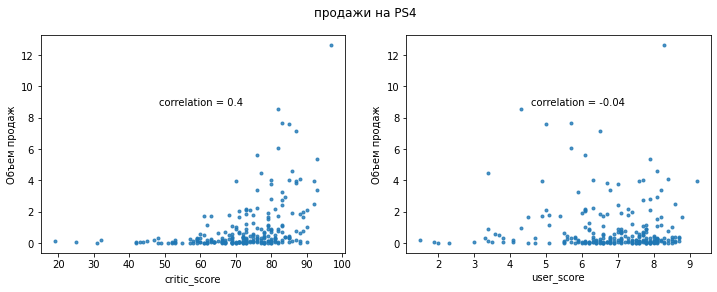

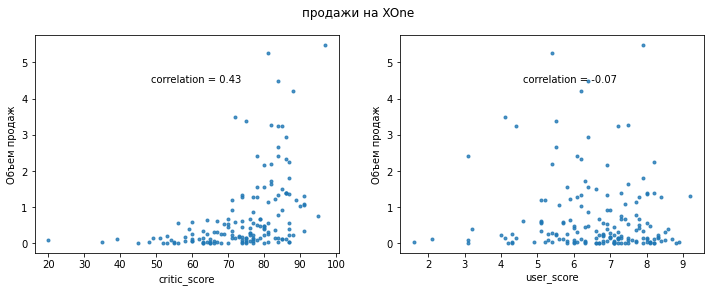

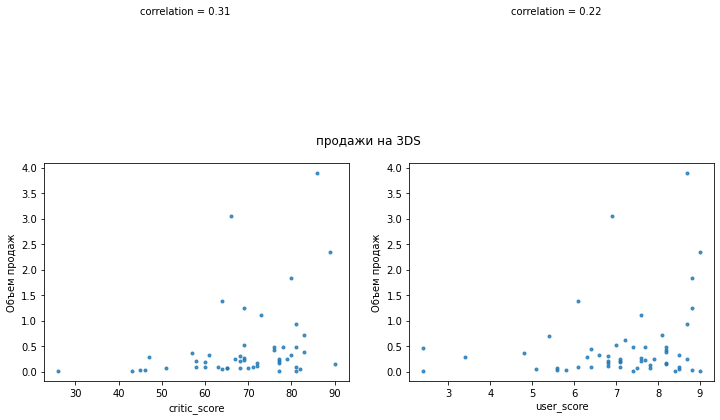

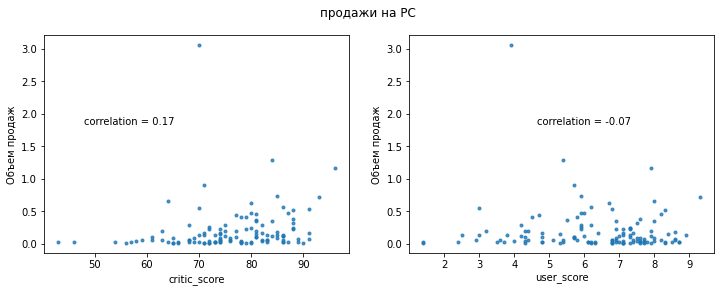

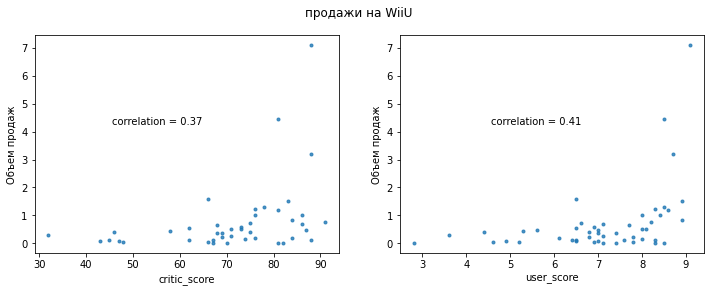

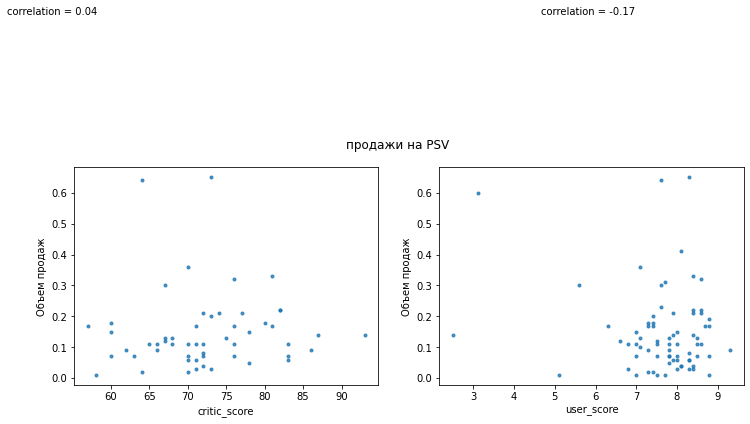

In [37]:
sales_cor_score(*top_platformes) # рисуем графики для топ платформ

Корреляция между продажами и пользовательскими оценками отсутствует.

Между оценками критиков и объемом продаж корреляция есть, но слабая(не более 0.4)

Исключением является платформа **WiiU**. Здесь тоже слабая корреляция между оценками критиков и продажами (0,35), но корреляция между оценками пользователей и продажами есть и даже больше(0,4).

##### Распределение объема продаж по жанрам

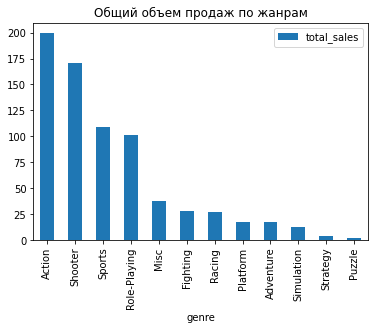

In [38]:
# построим столбчатую диаграмму

(
    games_actual
    .pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot.bar(title='Общий объем продаж по жанрам')

)
None

Больше всего продаж в жанре Action, меньше всего в жанре Strategy, но здесь не учитывается количество игр. Возможно, игр в жанре Action просто больше, поэтому построим распределение медианного объема продаж по жанрам.

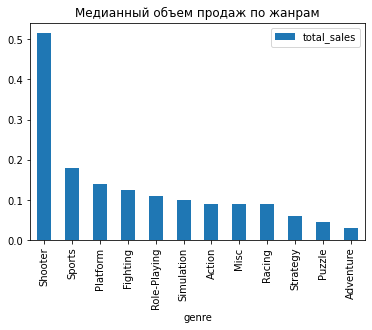

In [39]:
(
    games_actual
    .pivot_table(index='genre', values='total_sales', aggfunc='median')
    .sort_values(by='total_sales', ascending=False)
    .plot.bar(title='Медианный объем продаж по жанрам')

)
None

Данная метрика лучше отображает прибыльность жанра. 

Топ 5 самых прибыльных жанров:
1. Shooter.
2. Platform.
3. Sports.
4. Action.
5. Racing.

Наименее прибыльные жанры:
1. Adventure.
2. Strategy.
3. Puzzle.
4. Simulation.
5. Misc.

**Общий вывод по исследовательскому анализу.** 

Итак, проведенный исследовательский анализ позволяет сделать несколько промежуточных выводов.

1. Индустрия видеоигр начала активно развиваться после 1990 года, а среднее время жизни платформы - 10 лет.  Таким образом, **актуальным периодом** для анализа можно считать **последние 10 лет**, с 2006 года.


2. Много игр проваливается в прокате и имеет низкие продажи, а некоторые наоборот выстреливают. Об этом говорит разница между средним и медианным объемом продаж. Платформы  **XOne, WiiU, PS4 и 3DS, PSV, PC** можно назвать **наиболее популярными и перспективными**.


3. Нет корреляции между объемом продаж и пользовательскими оценками. Однако, есть слабая корреляция между оценками критиков и объемом продаж. В случае платформы WiiU есть слабая корреляция между оценками пользователей и объемом продаж. Она примерно такая же как корреляция между оценками критиков и объемом продаж.


4. И, наконец, основываясь на данных о прибыльности разных жанров игр, можно сделать вывод, что **наиболее прибыльными** жанрами являются **`shooter`, `platform`, `sports`, `action`, `racing`**. Наименее прибыльные жанры: adventure, strategy, puzzle, simulation, misc.

#### Шаг 4. Портрет пользователя региона

Напишем функцию, которая будет для каждого региона за данный период выводить диаграммы продаж:
* топ 5 платформ;
* топ 5 жанров;
* зависимости уровня продаж от возрастного рейтинга.

In [40]:
def portrait(reg, period):    
    games_for_the_period = games.query(f'year_of_release > {2016 - period}')
    features = ['platform', 'genre', 'rating']
    features_d = {'platform': 'Платформы', 'genre': 'Жанры', 'rating': 'Рейтинги'}
    regions = {'na': 'Америке', 'eu': 'Европе', 'jp': 'Японии'}
    
    def piv_tab(feature):
        region_top5_feature = (
            games_for_the_period
            .pivot_table(index=feature, values=reg+'_sales', aggfunc='sum')
            .sort_values(by=reg+'_sales', ascending=False).head()
        )
        return region_top5_feature
    
    f, axs = plt.subplots(1, 3, figsize=(17, 5), sharey=True)
    f.suptitle(f'Топ-5 по уровню продаж в {regions[reg]} за последние {period} лет', fontsize=16)
    for i in range(3):
        axs[i].bar(piv_tab(features[i]).index.tolist(),
                   piv_tab(features[i]).values.flatten().tolist()
                  )
        axs[i].set_title(features_d[features[i]])
        axs[i].set_ylabel('Объем продаж')

Для составления портрета пользователя нужны самые актуальные данные. Период в 10 лет может не отражать нынешние тренды. Проверим данное утверждение.

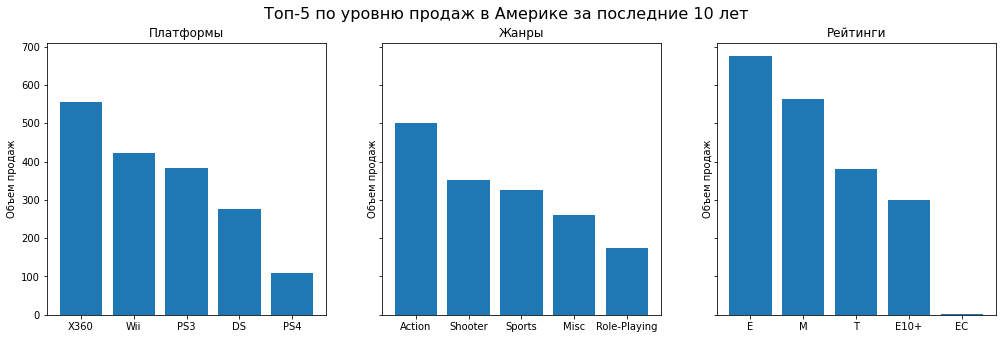

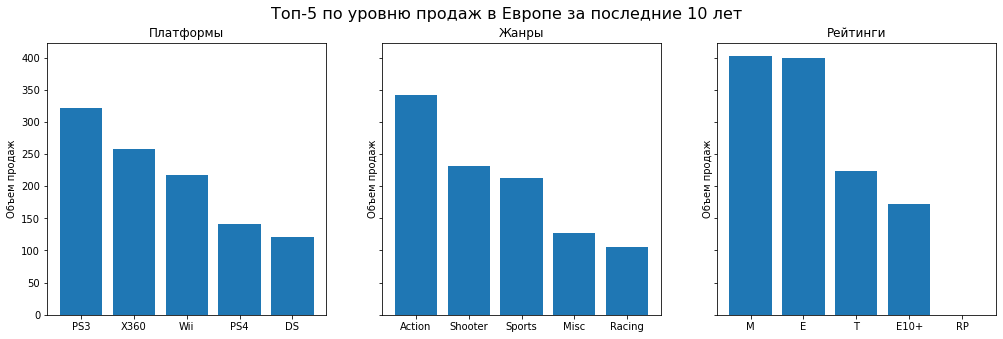

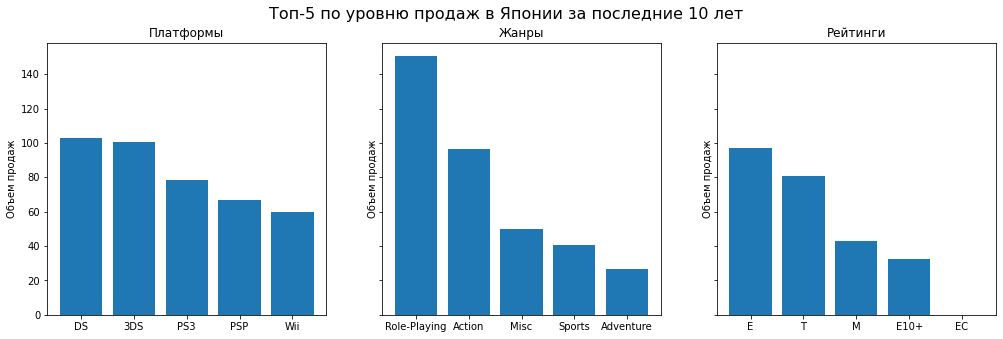

In [41]:
for regg in ['na', 'eu', 'jp']: # посмотрим продажи за период 10 лет
    portrait(regg, 10)

Среди самых популярных платформ нет ни PS4 ни Xbox One, так как данные платформы вышли недавно и существуют менее 10 лет и не успели накопить продажи как PS3 или Xbox 360. Поэтому правильнее строить портрет пользователя за более короткий период.

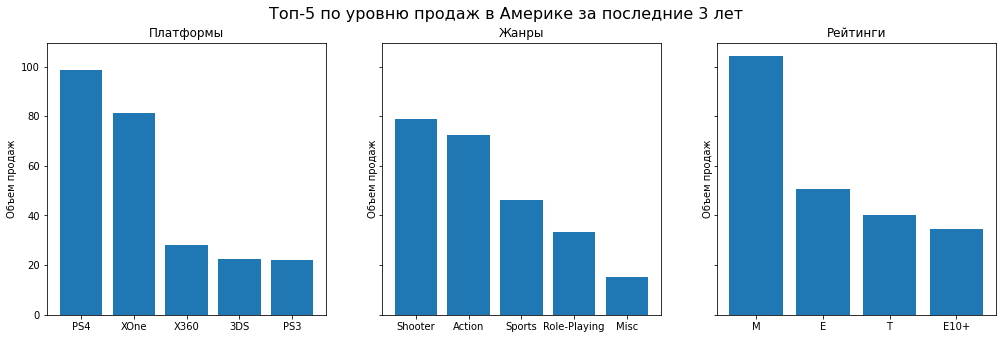

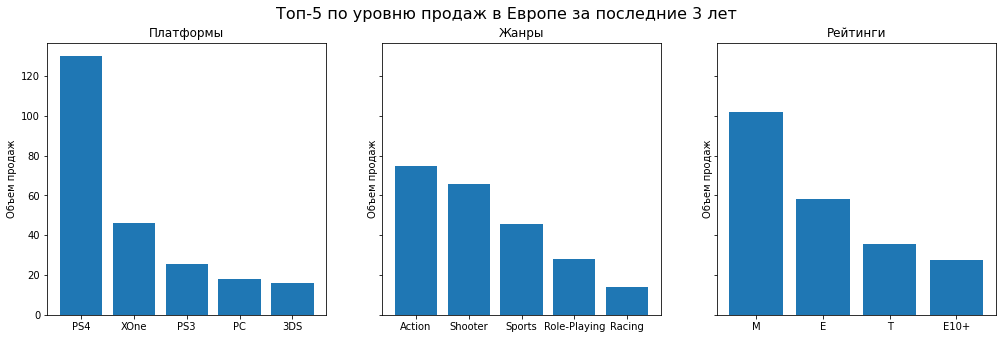

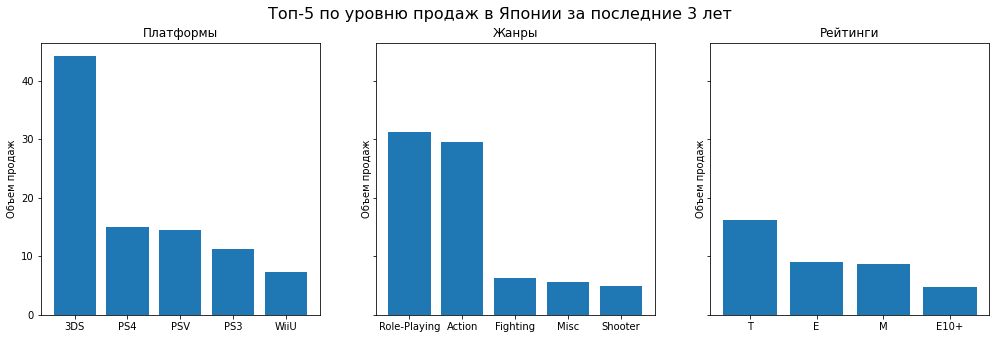

In [42]:
for regg in ['na', 'eu', 'jp']: # посмотрим продажи за период 3 года
    portrait(regg, 3)

**Вывод:** Итак исходя из вышенарисованных диаграмм можем составить портрет пользователя ждя каждого региона.
1. Американские пользователи:
    * Предпочитаемая платформа: PS4, XOne.
    * Предпочитаемый жанр: Shooter, Action.
    * Возрастной рейтинг: M(взрослый).


2. Европейские пользователи:
    * Предпочитаемая платформа: PS4.
    * Предпочитаемый жанр: Action, Shooter.
    * Возрастной рейтинг: M(взрослый).


3. Пользователи из Японии:
    * Предпочитаемая платформа: 3DS.
    * Предпочитаемый жанр: Role-Playing, Action.
    * Возрастной рейтинг: T(взрослый).
    
По Европе и Америке имеем почти одинаковые портреты пользователей. У японцев явно иные предпочтения.

#### Шаг 5. Проверка гипотез

##### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем гипотезы:

* H0: Средние пользовательские рейтинги платформ Xbox One и PC не отличаются.
* H1: Средние пользовательские рейтинги платформ Xbox One и PC отличаются.

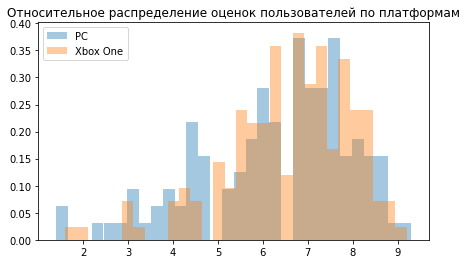

In [43]:
# Построим распределения для наглядности

plt.figure(figsize=(7, 4))
plt.hist(games_actual.query('platform == "PC"')['user_score'], label='PC', bins=30, alpha=0.4, density=True)
plt.hist(games_actual.query('platform == "XOne"')['user_score'], label='Xbox One', bins=30, alpha=0.4, density=True)
plt.title('Относительное распределение оценок пользователей по платформам')
plt.legend()
None

In [44]:
games_actual.query('platform in ["PC", "XOne"]').groupby(by='platform')['user_score'].describe() # добавим метрики

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PC,122.0,6.298361,1.703278,1.4,5.325,6.8,7.6,9.3
XOne,165.0,6.594545,1.375139,1.6,5.800,6.8,7.6,9.2


Для проверки гипотезы используем ttest равенства 2 средних независимых выборок.

In [45]:
# Проведем ttest

alpha = 0.01 # уровень значимости

res = st.ttest_ind(games_actual.query('platform == "PC"')['user_score'].dropna(), # тест
             games_actual.query('platform == "XOne"')['user_score'].dropna(), 
                  equal_var=False)
print(res.pvalue)

if res.pvalue < alpha:
    print('Можем отвергнуть нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Не получилось отвергнуть нулевую гипотезу, а значит можно считать с высокой вероятностью, что средние пользовательские рейтинги платформ Xbox One и PC не отличаются. 

Кстати при уровне значимости 0.05 различия в пользовательских рейтингах можно было бы считать статистически значимыми. 

##### Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем гипотезы:

* H0: Средние пользовательские рейтинги жанров Action и Sports не отличаются.
* Н1: Средние пользовательские рейтинги жанров Action и Sports имеют отличия.

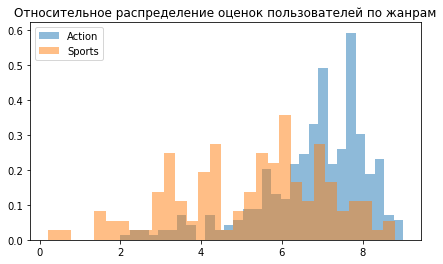

In [46]:
# Построим распределения по жанрам

plt.figure(figsize=(7, 4))
plt.hist(games_actual.query('genre == "Action"')['user_score'], label='Action', bins=30, alpha=0.5, density=True)
plt.hist(games_actual.query('genre == "Sports"')['user_score'], label='Sports', bins=30, alpha=0.5, density=True)
plt.title('Относительное распределение оценок пользователей по жанрам')
plt.legend()
None

In [47]:
games_actual.query('genre in ["Action", "Sports"]').groupby(by='genre')['user_score'].describe() # метрики

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,297.0,6.760606,1.377852,2.0,6.1,7.1,7.70,9.0
Sports,127.0,5.225197,1.856604,0.2,4.0,5.5,6.65,8.8


Для проверки гипотезы используем ttest равенства 2 средних независимых выборок.

In [48]:
# ttest

alpha = 0.01 # уровень значимости

res = st.ttest_ind(games_actual.query('genre == "Action"')['user_score'].dropna(), # тест
              games_actual.query('genre == "Sports"')['user_score'].dropna(),
                  equal_var=False)
print(res.pvalue)

if res.pvalue < alpha:
    print('Можем отвергнуть нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14
Можем отвергнуть нулевую гипотезу


T-критерий показал что мы можем отвергнуть нулевую гипотезу в пользу альтернативной, а значит средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые различия.

**Вывод:** В ходе проверки гипотез, была отвергнута только последняя гипотеза, а значит можем с высокой вероятностью констатировать следующие утверждения: 
 * Средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых различий.
 * Средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые различия.

### Вывод

В результате проведенного исследования были получены следующие результаты и выводы:

**Загрузка данных**

Были выявлены следующие проблемы:

- Название колонок имеет неудобный формат, лучше привести к "змеиному" регистру для удобства работы;
- Много пропусков в столбцах с оценками и возрастным рейтингом;
- Есть небольшое количество пропусков в столбцах с названием игры и жанром;
- Формат данных в колонке с годом релиза имеет вид `float`, лучше поменять на `int`;
- Формат данных с столбце `User_Score` имеет строковый вид.

**Предобработка данных.**

Для удобства работы с данными были проведены следующие действия:

- Названия столбцов были приведены к "змеиному_регистру";
- Столбец `year_of_release` был приведен в целочисленный тип `int`, заполнены были примерно половина пропусков, оставшиеся **146** пустых строк были удалены;
- Было удалено еще **2 строки** с пропусками в столбцах `name` и `genre`;
- Избавились от аббревиатуры *tbd ("будет определено")* в столбце `user_score`, заменив на NaN, привели столбец к числовому формату `float`;
- Заполнены были примерно **400** пропусков в столбце `rating` аналогичным образом, как в столбце `year_of_release`;
- Добавлен столбец с суммарными продажами `total_sales`, сложив все столбцы `*_sales`.

В результате предобработки данных из **16715 строк осталось 16567**, что составляет **99.1%** от общего числа. Однако, осталось много пропусков (порядка половины) в столбцах с оценками и возрастным рейтингом, которые были оставлены как есть.

**Исследовательский анализ.**

В ходе исследовательского анализа были получены следующие результаты:

- Индустрия видеоигр начала активно развиваться после 1990 года, а среднее время жизни платформы - 10 лет. Таким образом, **актуальным периодом для анализа можно считать последние 10 лет**, с 2006 года.
- Много игр проваливается в прокате и имеет низкие продажи, а некоторые наоборот выстреливают. Об этом говорит разница между средним и медианным объемом продаж. Платформы `XOne`, `WiiU`, `PS4` и `3DS`, `PSV`, `PC` можно назвать наиболее популярными и перспективными.
- Нет корреляции между объемом продаж и пользовательскими оценками. Однако, есть слабая корреляция между оценками критиков и объемом продаж. В случае платформы WiiU есть слабая корреляция между оценками пользователей и объемом продаж. Она примерно такая же как корреляция между оценками критиков и объемом продаж.
- И, наконец, основываясь на данных о прибыльности разных жанров игр, можно сделать вывод, что наиболее прибыльными жанрами являются `shooter`, `platform`, `sports`, `action` и `racing`.

**Анализ пользователей.**

На последующем этапе были составлены портреты пользователей для каждого региона в зависимости от предпочитаемых платформ и жанров игр. Были выявлены следующие результаты:

- В Северной Америке и Европе предпочтения пользователей схожи, наиболее популярными платформами являются **PS4, XOne и PC**. Пользователи в Северной Америке предпочитают играть в жанр `shooter`, в то время как в Европе наиболее популярен жанр `action`.
- В Японии популярность платформ распределена иначе: наиболее популярными являются **3DS, PSV и PS4**. Жанры, популярные в Японии, отличаются от Северной Америки и Европы: здесь наиболее популярны `RPG`, `action` и `platform`.
- Наиболее популярным возрастным рейтингом в Северной Америке и Европе является **M "для взрослых"**, в Японии самый популярный возрастной рерйтинг **T "для всех"**

**Проверка гипотез.**

Были проверены две гипотезы:

- Средние пользовательские рейтинги платформ Xbox One и PC равны.
- Средние пользовательские рейтинги жанров Action и Sports разные.

В результате проверки гипотез были получены следующие результаты:

- Средние пользовательские рейтинги платформ Xbox One и PC не имеют статистически значимых различий.
- Средние пользовательские рейтинги жанров Action и Sports имеют статистически значимые различия.

На основе проведенного анализа можно рекомендовать разработчикам игр делать упор на платформы **PS4, XOne, WiiU, PSV и PC**, а также на жанры `shooter`, `platform`, `sports`, `action` и `racing`. Также предпочтительны игры с рейтингом ESRB "для взрослых" в Америке и Европе и "для подростков" в Японии. При этом стоит учитывать, что мнение пользователей не оказывает прямого влияния на объем продаж, но может влиять на репутацию игры и, в конечном итоге, на успех проекта.